In [2]:
import cv2 as cv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
import glob
from collections import defaultdict
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors  import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import f1_score, make_scorer
import seaborn as sns


# Testing Image for Different Features

(6000, 4000, 3)


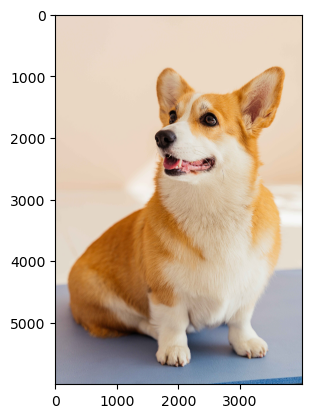

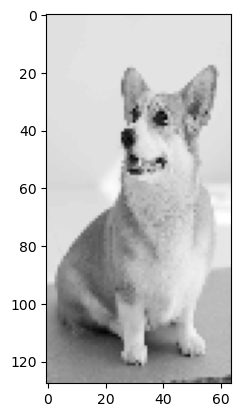

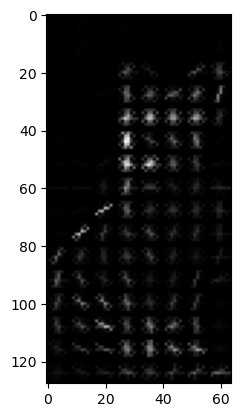

In [6]:

# Read the image with OPENCV
imgs = np.array(cv.imread('./corgi.jpg'))
# Change GBR to RGB
rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
# Resize and Greyscale
resize_img = cv.resize(rgb,(64,128))
gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
# Turn Image to into pixel with HOG Method
feature , hog_img= hog(gray, pixels_per_cell=(8, 8),cells_per_block=(2, 2),visualize=True)
avg_color = np.average(resize_img, axis=0)
R,G,B = np.average(avg_color, axis=0)
print(imgs.shape)
plt.imshow(rgb)
plt.show()
plt.imshow(gray, cmap="gray")
plt.show() 
plt.imshow(hog_img,cmap="gray")
plt.show() 

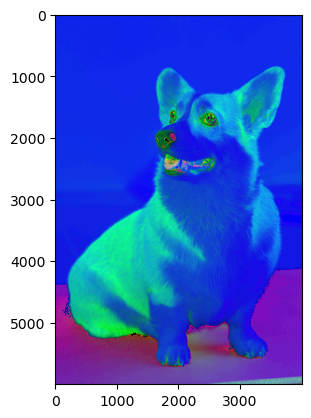

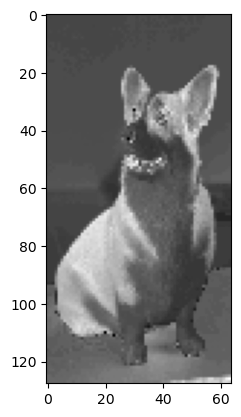

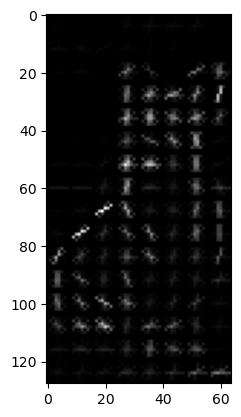

In [7]:
# Change GBR to HSV
hsv = cv.cvtColor(rgb, cv.COLOR_RGB2HSV)
# Resize and Greyscale
resize_img = cv.resize(hsv,(64,128))
gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
feature , hog_img= hog(gray, pixels_per_cell=(8, 8),cells_per_block=(2, 2),visualize=True,channel_axis = None)
plt.imshow(hsv)
plt.show()
plt.imshow(gray,cmap="gray")
plt.show()
plt.imshow(hog_img,cmap="gray")
plt.show()

136
255
204.0


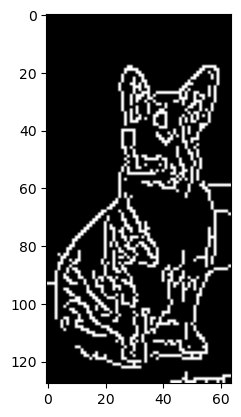

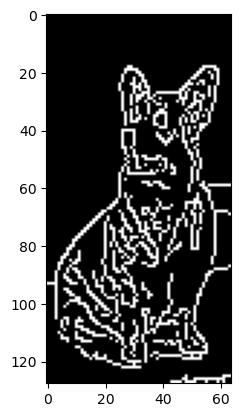

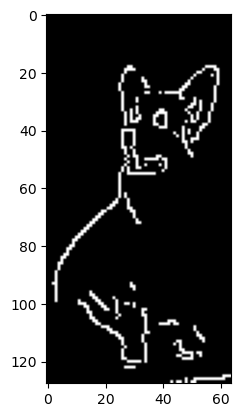

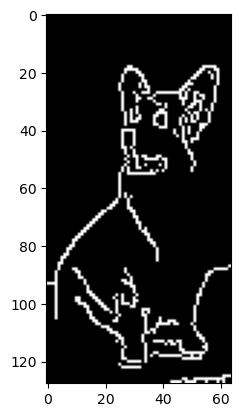

' cv.imshow("Wide Edge Map", wide)\ncv.imshow("Mid Edge Map", mid)\ncv.imshow("Tight Edge Map", tight)\ncv.waitKey(10000) \ncv.destroyAllWindows()\ncv.waitKey(50) '

In [8]:

# Auto tune the values for Canny Edge input
def auto_canny(imgs, sigma=0.15):
	# find the median
	median_pixel = np.median(imgs)
	# auto Canny
	lower = int(max(0, (1.0 - sigma) * median_pixel))
	upper = int(min(255, (1.0 + sigma) * median_pixel))
	edge_value = cv.Canny(imgs, lower, upper)
	# return the edged image
	return edge_value,lower,upper,median_pixel

 # Apply GaussianBlur for the image
gray = cv.cvtColor(rgb, cv.COLOR_RGB2GRAY)
blurred = cv.GaussianBlur(gray,(7,7),0)
resize_img = cv.resize(blurred,(64,128))

# Set wide , mid, tigth and auto to get different image
auto,lower,upper,median_pixel = auto_canny(resize_img,sigma=0.33)
wide = cv.Canny(resize_img, 10, 200)
mid = cv.Canny(resize_img, 50, 120)
tight = cv.Canny(resize_img, 240, 250)

print(lower)
print(upper)
print(median_pixel)
plt.imshow(wide,cmap="gray")
plt.show() 
plt.imshow(mid,cmap="gray")
plt.show() 
plt.imshow(tight,cmap="gray")
plt.show() 
plt.imshow(auto,cmap="gray")
plt.show() 
""" cv.imshow("Wide Edge Map", wide)
cv.imshow("Mid Edge Map", mid)
cv.imshow("Tight Edge Map", tight)
cv.waitKey(10000) 
cv.destroyAllWindows()
cv.waitKey(50) """

---------
# Data Augmentation

### Add Noise & Rotation

#### Sapmple Images

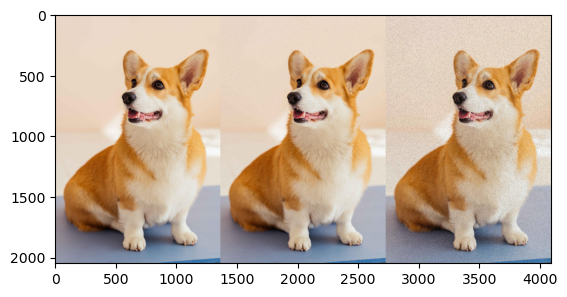

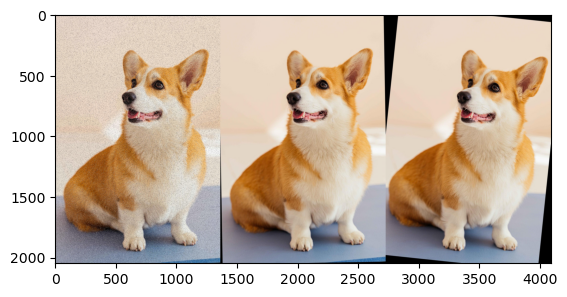

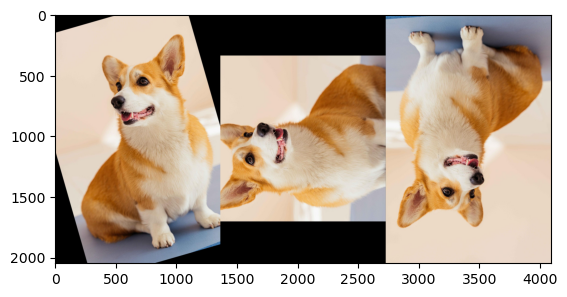

In [9]:
# read and show the augmented image 
imgs1 = np.array(cv.imread('./Testing_Image//corgi1.jpg'))
rgb1 = cv.cvtColor(imgs1, cv.COLOR_BGR2RGB)
imgs2 = np.array(cv.imread('./Testing_Image//corgi2.jpg'))
rgb2 = cv.cvtColor(imgs2, cv.COLOR_BGR2RGB) 
imgs3 = np.array(cv.imread('./Testing_Image//corgi3.jpg'))
rgb3 = cv.cvtColor(imgs3, cv.COLOR_BGR2RGB) 
imgs4 = np.array(cv.imread('./Testing_Image//corgi4.jpg'))
rgb4 = cv.cvtColor(imgs4, cv.COLOR_BGR2RGB) 
imgs5 = np.array(cv.imread('./Testing_Image//corgi5.jpg'))
rgb5 = cv.cvtColor(imgs5, cv.COLOR_BGR2RGB) 
imgs6 = np.array(cv.imread('./Testing_Image//corgi6.jpg'))
rgb6 = cv.cvtColor(imgs6, cv.COLOR_BGR2RGB) 
imgs7 = np.array(cv.imread('./Testing_Image//corgi7.jpg'))
rgb7 = cv.cvtColor(imgs7, cv.COLOR_BGR2RGB) 
imgs8 = np.array(cv.imread('./Testing_Image//corgi8.jpg'))
rgb8 = cv.cvtColor(imgs8, cv.COLOR_BGR2RGB) 
imgs9 = np.array(cv.imread('./Testing_Image//corgi9.jpg'))
rgb9 = cv.cvtColor(imgs9, cv.COLOR_BGR2RGB) 

add = cv.hconcat([rgb1, rgb2, rgb3])
add1 = cv.hconcat([rgb4, rgb5, rgb6])
add2 = cv.hconcat([rgb7, rgb8, rgb9])

plt.imshow(add)
plt.show()
plt.imshow(add1)
plt.show()
plt.imshow(add2)
plt.show()

-----------
# Feature Extraction

In [17]:
# Corgi = 0, German = 1, Golden = 2

# Load Infomation into list
df_dict = defaultdict(list)

def toDict(file_name,classes,height,width,d,R,G,B):
    df_dict['file_name'].append(file_name)
    df_dict['height'].append(height)
    df_dict['width'].append(width)
    df_dict['resolution'].append(height*width)
    df_dict['dimension'].append(d)
    df_dict['R'].append(R)
    df_dict['G'].append(G)
    df_dict['B'].append(B)
    df_dict['classes'].append(classes)

# Resize Grayscale for Min Max PCA
def Grayscale(img):
    imgs = np.array(cv.imread(img))
    rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    resize_img = cv.resize(rgb,(64,128))
    gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
    pixel = gray.flatten()
    pixel = pixel.astype(np.uint8)
    return pixel

# Hog Resize Grayscale
def grayHog(img):
    imgs = np.array(cv.imread(img))
    rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    resize_img = cv.resize(rgb,(64,128))
    gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
    feature = hog(gray, pixels_per_cell=(8, 8),cells_per_block=(2, 2))
    return feature

# HSV HOG Grayscale
def HSV_HOG(img):
    imgs = np.array(cv.imread(img))
    rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    hsv = cv.cvtColor(rgb, cv.COLOR_RGB2HSV)
    resize_img = cv.resize(hsv,(64,128))
    gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
    feature = hog(gray, pixels_per_cell=(8, 8),cells_per_block=(2, 2))
    return feature

# Canny Edge
def Egde(img):
    imgs = np.array(cv.imread(img))
    rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(rgb, cv.COLOR_RGB2GRAY)
    blurred = cv.GaussianBlur(gray,(7,7),0)
    resize_img = cv.resize(blurred,(64,128))
    #wide = cv.Canny(resize_img, 10, 200)
    mid = cv.Canny(resize_img, 50, 120)
    #tight = cv.Canny(resize_img, 240, 250)
    pixel_Edge = mid.flatten()
    pixel_Edge = pixel_Edge.astype(np.uint8)
    return pixel_Edge

# Infomation For EDA
def image_info(img):
    file_path = img
    file_name = os.path.basename(file_path)
    imgs = cv.imread(img)
    height, width, d = imgs.shape
    rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
    resize_img = cv.resize(rgb,(64,128))
    avg_color = np.average(rgb, axis=0)
    R,G,B = np.average(avg_color, axis=0)
    return file_name,height,width,d,R,G,B



--------
# Training Set

In [16]:

X_train = []
y_train = []

X_HSV_train = []
y_HSV_train = []

X_HOG_train = []
y_HOG_train = []

X_Edge_train = []
y_Edge_train = []



# Corgi
for i, Corgi in enumerate(glob.glob('./filterimage/Corgi_Filtered/train/Corgi/*.jpg')):
    try:
        classes = 0
        # EDA
        file_name,height,width,d,R,G,B = image_info(Corgi)
        toDict(file_name,classes,height,width,d,R,G,B)

        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(Corgi)
        X_train.append(normal_gray)
        y_train.append(0)
        
        # Grayscale to Hog
        normal_HOG = grayHog(Corgi)
        X_HOG_train.append(normal_HOG)
        y_HOG_train.append(0)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(Corgi)
        X_HSV_train.append(hsv)
        y_HSV_train.append(0)

        # Canny Edge to 64x128
        edge = Egde(Corgi)
        X_Edge_train.append(edge)
        y_Edge_train.append(0)

    except Exception:
        pass
# German
for i, German in enumerate(glob.glob('./filterimage/German_Filtered/train/German/*.jpg')):
    try:
        classes = 1
        # EDA
        file_name,height,width,d,R,G,B = image_info(German)
        toDict(file_name,classes,height,width,d,R,G,B)
        
        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(German)
        X_train.append(normal_gray)
        y_train.append(1)
        
        # Grayscale to Hog
        normal_HOG = grayHog(German)
        X_HOG_train.append(normal_HOG)
        y_HOG_train.append(1)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(German)
        X_HSV_train.append(hsv)
        y_HSV_train.append(1)

        # Canny Edge to 64x128
        edge = Egde(German)
        X_Edge_train.append(edge)
        y_Edge_train.append(1) 

    except Exception:
        pass

# Golden
for i, Golden in enumerate(glob.glob('./filterimage/Golden_Filtered/train/Golden/*.jpg')):
    try:
        classes = 2
        # EDA
        file_name,height,width,d,R,G,B = image_info(Golden)
        toDict(file_name,classes,height,width,d,R,G,B)
        
        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(Golden)
        X_train.append(normal_gray)
        y_train.append(2)
        
        # Grayscale to Hog
        normal_HOG = grayHog(Golden)
        X_HOG_train.append(normal_HOG)
        y_HOG_train.append(2)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(Golden)
        X_HSV_train.append(hsv)
        y_HSV_train.append(2)

        # Canny Edge to 64x128
        edge = Egde(Golden)
        X_Edge_train.append(edge)
        y_Edge_train.append(2)

    except Exception:
        pass 


In [29]:
X_traino = []
y_traino = []


# Corgi
for i, Corgi in enumerate(glob.glob('./raw_train_test_images/Corgi/train/*.jpg')):
    try:
        classes = 0

        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(Corgi)
        X_traino.append(normal_gray)
        y_traino.append(0)
        
     
    except Exception:
        pass
# German
for i, German in enumerate(glob.glob('./raw_train_test_images/German/train/*.jpg')):
    try:
        classes = 1

        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(German)
        X_traino.append(normal_gray)
        y_traino.append(1)


    except Exception:
        pass

# Golden
for i, Golden in enumerate(glob.glob('./raw_train_test_images/Golden/train/*.jpg')):
    try:
        classes = 2
        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(Golden)
        X_traino.append(normal_gray)
        y_traino.append(2)
        


    except Exception:
        pass 

------------
# Testing Set

In [17]:

X_test = []
y_test = []

X_HSV_test = []
y_HSV_test = []

X_HOG_test = []
y_HOG_test = []

X_Edge_test = []
y_Edge_test = []


# Corgi
for i, Corgi in enumerate(glob.glob('./filterimage/Corgi_Filtered/test/*.jpg')):
    try:
        classes = 0
        # EDA
        file_name,height,width,d,R,G,B = image_info(Corgi)
        toDict(file_name,classes,height,width,d,R,G,B)

        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(Corgi)
        X_test.append(normal_gray)
        y_test.append(0)
        
        # Grayscale to Hog
        normal_HOG = grayHog(Corgi)
        X_HOG_test.append(normal_HOG)
        y_HOG_test.append(0)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(Corgi)
        X_HSV_test.append(hsv)
        y_HSV_test.append(0)

        # Canny Edge to 64x128
        edge = Egde(Corgi)
        X_Edge_test.append(edge)
        y_Edge_test.append(0)
 
    except Exception:
        pass
    
# German
for i, German in enumerate(glob.glob('./filterimage/German_Filtered/test/*.jpg')):
    try:
        classes = 1
        # EDA
        file_name,height,width,d,R,G,B = image_info(German)
        toDict(file_name,classes,height,width,d,R,G,B)

        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(German)
        X_test.append(normal_gray)
        y_test.append(1)
        
        # Grayscale to Hog
        normal_HOG = grayHog(German)
        X_HOG_test.append(normal_HOG)
        y_HOG_test.append(1)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(German)
        X_HSV_test.append(hsv)
        y_HSV_test.append(1)

        # Canny Edge to 64x128
        edge = Egde(German)
        X_Edge_test.append(edge)
        y_Edge_test.append(1)

    except Exception:
        pass

# Golden
for i, Golden in enumerate(glob.glob('./filterimage/Golden_Filtered/test/*.jpg')):
    
    try:
        classes = 2
        # EDA
        file_name,height,width,d,R,G,B = image_info(Golden)
        toDict(file_name,classes,height,width,d,R,G,B)

        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(Golden)
        X_test.append(normal_gray)
        y_test.append(2)
        
        # Grayscale to Hog
        normal_HOG = grayHog(Golden)
        X_HOG_test.append(normal_HOG)
        y_HOG_test.append(2)

        # HSV to Grayscale to Hog
        hsv = HSV_HOG(Golden)
        X_HSV_test.append(hsv)
        y_HSV_test.append(2)

        # Canny Edge to 64x128
        edge = Egde(Golden)
        X_Edge_test.append(edge)
        y_Edge_test.append(2)

    except Exception:
        pass 

In [30]:
X_testo = []
y_testo = []


# Corgi
for i, Corgi in enumerate(glob.glob('./raw_train_test_images/Corgi/test/*.jpg')):
    try:
        classes = 0
        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(Corgi)
        X_testo.append(normal_gray)
        y_testo.append(0)

 
    except Exception:
        pass
    
# German
for i, German in enumerate(glob.glob('./raw_train_test_images/German/test/*.jpg')):
    try:
        classes = 1
        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(German)
        X_testo.append(normal_gray)
        y_testo.append(1)
        


    except Exception:
        pass

# Golden
for i, Golden in enumerate(glob.glob('./raw_train_test_images/Golden/test/*.jpg')):
    
    try:
        classes = 2

        # Resize Grayscale for Min Max PCA
        normal_gray = Grayscale(Golden)
        X_testo.append(normal_gray)
        y_testo.append(2)
        

    except Exception:
        pass 

------------
# EDA

In [13]:
#df = pd.DataFrame.from_dict(df_dict)
#df

In [14]:
#df.to_csv('Image_Info.csv',index=False)


X_test
y_test 

X_HSV_test 
y_HSV_test 

X_HOG_test 
y_HOG_test 

X_Edge_test 
y_Edge_test 


X_train 
y_train 

X_HSV_train 
y_HSV_train 

X_HOG_train 
y_HOG_train 

X_Edge_train
y_Edge_train 

--------------
# Load Data Frame to CSV (Before Normalization & PCA)

In [37]:
# Original Image
X_train_o = pd.DataFrame(X_traino).astype(np.uint8)
X_test_o = pd.DataFrame(X_testo).astype(np.uint8)
y_train_o = pd.DataFrame(y_traino)  
y_test_o = pd.DataFrame(y_testo)  

In [38]:
X_train_o.to_csv('X_train_o.csv', index = False)
X_test_o.to_csv('X_test_o.csv', index = False)
y_train_o.to_csv('y_train_o.csv', index = False)
y_test_o.to_csv('y_test_o.csv', index = False)

In [18]:
# Training
train_b4_norm = pd.DataFrame(X_train).astype(np.uint8)
train_hog_b4_norm = pd.DataFrame(X_HOG_train)
train_HSV_b4_norm = pd.DataFrame(X_HSV_train)
train_Edge_b4_norm = pd.DataFrame(X_Edge_train).astype(np.uint8)

#Testing
test_b4_norm = pd.DataFrame(X_test).astype(np.uint8)
test_hog_b4_norm = pd.DataFrame(X_HOG_test)
test_HSV_b4_norm = pd.DataFrame(X_HSV_test)
test_Edge_b4_norm = pd.DataFrame(X_Edge_test).astype(np.uint8) 

y_train_lb = pd.DataFrame(y_train)  
y_test_lb = pd.DataFrame(y_test)  


y_train_lb.to_csv('y_train_lb.csv', index = False)
y_test_lb.to_csv('y_test_lb.csv', index = False)

In [23]:
train_b4_norm.to_csv('X_train.csv', index = False)
train_hog_b4_norm.to_csv('X_HOG_train.csv', index = False)
train_HSV_b4_norm.to_csv('X_HSV_train.csv', index = False)
train_Edge_b4_norm.to_csv('X_Edge_train.csv', index = False)

test_b4_norm.to_csv('X_test.csv', index = False)
test_hog_b4_norm.to_csv('X_HOG_test.csv', index = False)
test_HSV_b4_norm.to_csv('X_HSV_test.csv', index = False)
test_Edge_b4_norm.to_csv('X_Edge_test.csv', index = False) 

----------
# Normalization

### Note: 
#### (X_test, X_train, X_Edge_test, X_Edge_train) Need to Normalize.
#### (X_HOG_test, X_HOG_train, X_HSV_test, X_HSV_train) Already Normaliz from 0 to 1 During HOG Process.



In [39]:
# Normalization with original image 
scaler = MinMaxScaler()
scaler.fit(X_train_o)
X_train_o_scaled = scaler.transform(X_train_o)
X_test_o_scaled = scaler.transform(X_test_o)

In [19]:
# MinMaxScaler for GrayScale X tain test
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MinMaxScaler for Edge X train test
scaler2 = MinMaxScaler()
scaler2.fit(X_Edge_train)
X_Edge_train_scaled = scaler2.transform(X_Edge_train)
X_Edge_test_scaled = scaler2.transform(X_Edge_test)


------------
# Dimension Reduction PCA 

### Show the Change from PCA of Different %

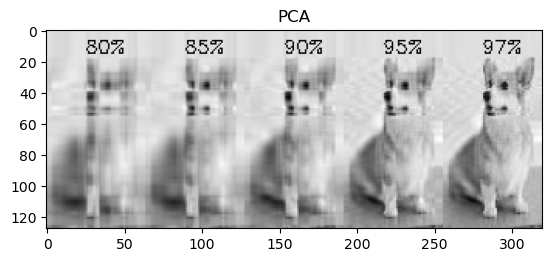

In [21]:
# Function for PCA
def PCA_img(percent,img):
    percent = percent/100
    img_pca = PCA(n_components = percent).fit(img)
    transform = img_pca.transform(img)
    pca_img = img_pca.inverse_transform(transform)
    return pca_img

imgs = np.array(cv.imread('./Testing_Image/corgi1.jpg'))
rgb = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)
resize_img = cv.resize(rgb,(64,128))
gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
a = PCA_img(80,gray)
b = PCA_img(85,gray)
c = PCA_img(90,gray)
d = PCA_img(95,gray)
e = PCA_img(97,gray)
a = cv.putText(a, '80%',(25,15), cv.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
b = cv.putText(b, '85%',(25,15), cv.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
c = cv.putText(c, '90%',(25,15), cv.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
d = cv.putText(d, '95%',(25,15), cv.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))
e = cv.putText(e, '97%',(25,15), cv.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0))

add = cv.hconcat([a, b, c, d, e])
plt.title('PCA')
plt.imshow(add,cmap='gray')
plt.show()
    

# PCA + MinMAx

In [2]:
X_train= pd.read_csv('./CSVBeforePCA/X_train.csv')
X_test= pd.read_csv('./CSVBeforePCA/X_test.csv')

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set n_components = 1250 based on the observation in Scree Plot
X_train_scaled_pca = PCA(n_components=0.97).fit(X_train_scaled)
X_train_final = X_train_scaled_pca.transform(X_train_scaled)
X_test_final = X_train_scaled_pca.transform(X_test_scaled)

In [40]:
X_train_scaled_pca = PCA(n_components=0.97).fit(X_train_o_scaled)
X_train_og = X_train_scaled_pca.transform(X_train_o_scaled)
X_test_og = X_train_scaled_pca.transform(X_test_o_scaled)
X_train_og = pd.DataFrame(X_train_og)
X_train_og['class'] = y_train_o
X_test_og = pd.DataFrame(X_test_og)
X_test_og['class'] = y_test_o

In [42]:
X_train_og.to_csv('./ReadyToTrainCSV/train_og.csv', index = False)
X_test_og.to_csv('./ReadyToTrainCSV/test_og.csv', index = False)

In [22]:
# PCA for Grayscale
X_train_scaled_pca = PCA(n_components=3240).fit(X_train_scaled)

# PCA for Canny Edge 
X_Edge_train_scaled_pca = PCA(n_components=3240).fit(X_Edge_train_scaled)

### Note:
#### Look at the Scree Plot & find n components base on the slowly increasing rate.

Text(0.5, 1.0, 'Scree plot for X Train Grayscale')

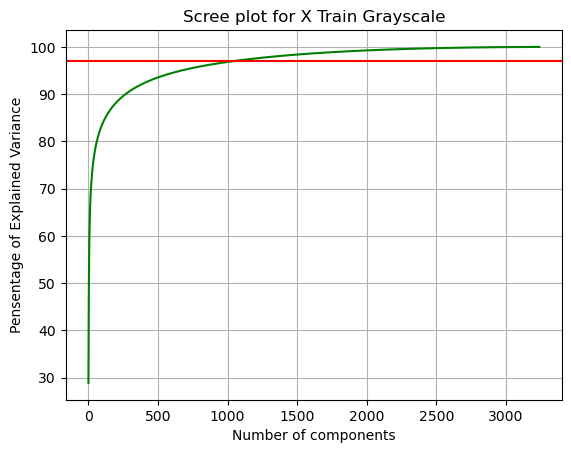

In [24]:
plt.grid()
plt.plot(np.cumsum(X_train_scaled_pca.explained_variance_ratio_ * 100), color='green')
plt.axhline(y=97,color='red')
plt.xlabel('Number of components')
plt.ylabel('Pensentage of Explained Variance')
plt.title('Scree plot for X Train Grayscale') 

# From the Scree Plot for X train Grayscale, We are choosing from 1250 components
-----------

Text(0.5, 1.0, 'Scree plot for X Train Canny Edge')

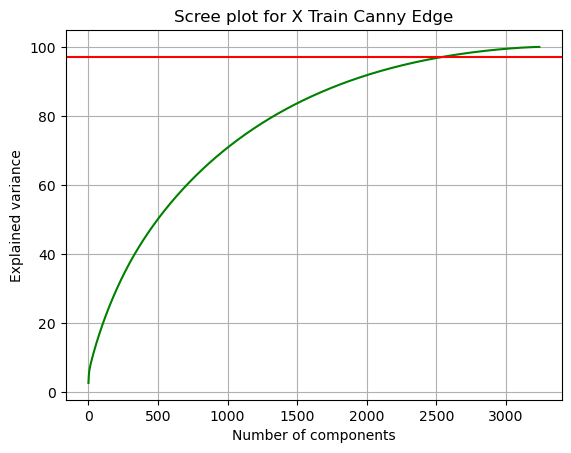

In [25]:
plt.grid()
plt.plot(np.cumsum(X_Edge_train_scaled_pca.explained_variance_ratio_ * 100), color='green')
plt.axhline(y=97,color='red')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree plot for X Train Canny Edge') 

# From the Scree Plot for X train Canny Edge, We are choosing from 2500 components

#

In [26]:
# Set n_components = 1250 based on the observation in Scree Plot
X_train_scaled_pca = PCA(n_components=0.97).fit(X_train_scaled)
# Set n_components = 2500 based on the observation in Scree Plot
X_Edge_train_scaled_pca = PCA(n_components=0.97).fit(X_Edge_train_scaled)

X_train_final = X_train_scaled_pca.transform(X_train_scaled)
X_test_final = X_train_scaled_pca.transform(X_test_scaled)

X_Edge_train_final = X_Edge_train_scaled_pca.transform(X_Edge_train_scaled)
X_Edge_test_final = X_Edge_train_scaled_pca.transform(X_Edge_test_scaled)

----------------
# PCA with HOG


train_hog_b4_norm <br>
train_HSV_b4_norm <br>
test_hog_b4_norm <br>
test_HSV_b4_norm <br>

In [27]:
# PCA for Grayscale
X_HOG_train_pca = PCA(n_components=3240).fit(train_hog_b4_norm)

# PCA for Canny Edge 
X_HSV_train_pca = PCA(n_components=3240).fit(train_HSV_b4_norm)

Text(0.5, 1.0, 'Scree plot for X Train Hog')

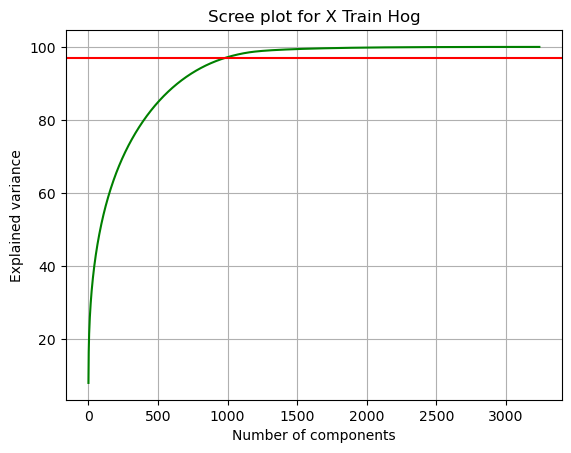

In [28]:
plt.grid()
plt.plot(np.cumsum(X_HOG_train_pca.explained_variance_ratio_ * 100),color='green')
plt.axhline(y=97,color='red')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree plot for X Train Hog') 

In [29]:
# PCA for Grayscale
X_HOG_train_pca = PCA(n_components=0.97).fit(train_hog_b4_norm)
X_HOG_train_final = X_HOG_train_pca.transform(train_hog_b4_norm)
X_HOG_test_final = X_HOG_train_pca.transform(test_hog_b4_norm)

# StandardScaler

In [30]:
""" from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
# Set n_components = 1250 based on the observation in Scree Plot
X_train_sc_pca = PCA(n_components=0.97).fit(X_train_sc)
X_train_sc_pca = X_train_scaled_pca.transform(X_train_sc)
X_test_sc_pca = X_train_scaled_pca.transform(X_test_sc) """

' from sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nsc.fit(X_train)\nX_train_sc = scaler.transform(X_train)\nX_test_sc = scaler.transform(X_test)\n# Set n_components = 1250 based on the observation in Scree Plot\nX_train_sc_pca = PCA(n_components=0.97).fit(X_train_sc)\nX_train_sc_pca = X_train_scaled_pca.transform(X_train_sc)\nX_test_sc_pca = X_train_scaled_pca.transform(X_test_sc) '

In [31]:
# Training
train_final = pd.DataFrame(X_train_final)
train_final['class'] = y_train_lb
train_hog_final = pd.DataFrame(X_HOG_train_final)
train_hog_final['class'] = y_train_lb
train_Edge_final = pd.DataFrame(X_Edge_train_final)
train_Edge_final['class'] = y_train_lb

# Testing
test_final = pd.DataFrame(X_test_final)
test_final['class'] = y_test_lb
test_hog_final = pd.DataFrame(X_HOG_test_final)
test_hog_final['class'] = y_test_lb
test_Edge_final = pd.DataFrame(X_Edge_test_final)
test_Edge_final['class'] = y_test_lb



In [32]:
# To CSV
train_final.to_csv('./ReadyToTrainCSV/X_train_final.csv', index = False)
train_hog_final.to_csv('./ReadyToTrainCSV/X_HOG_train_final.csv', index = False)
train_Edge_final.to_csv('./ReadyToTrainCSV/X_Edge_train_final.csv', index = False)

test_final.to_csv('./ReadyToTrainCSV/X_test_final.csv', index = False)
test_hog_final.to_csv('./ReadyToTrainCSV/X_HOG_test_final.csv', index = False)
test_Edge_final.to_csv('./ReadyToTrainCSV/X_Edge_test_final.csv', index = False)


-----------
# Load CSV

In [3]:
from sklearn.utils import shuffle

X_train_finalV = pd.read_csv('./ReadyToTrainCSV/X_train_final.csv')
X_train_finalV = shuffle(X_train_finalV)
y_train = X_train_finalV.iloc[:,-1]
X_train_finalV = X_train_finalV.drop('class', axis=1)

X_HOG_train_finalV = pd.read_csv('./ReadyToTrainCSV/X_HOG_train_final.csv')
X_HOG_train_finalV = shuffle(X_HOG_train_finalV)
y_HOG_train = X_HOG_train_finalV.iloc[:,-1]
X_HOG_train_finalV = X_HOG_train_finalV.drop('class', axis=1)

X_test_finalV = pd.read_csv('./ReadyToTrainCSV/X_test_final.csv')
y_test = X_test_finalV.iloc[:,-1]
X_test_finalV = X_test_finalV.drop('class', axis=1)

X_HOG_test_finalV = pd.read_csv('./ReadyToTrainCSV/X_HOG_test_final.csv')
y_HOG_test = X_HOG_test_finalV.iloc[:,-1]
X_HOG_test_finalV = X_HOG_test_finalV.drop('class', axis=1)

X_train_og = pd.read_csv('./ReadyToTrainCSV/train_og.csv')
X_train_og = shuffle(X_train_og)
y_train_og = X_train_og.iloc[:,-1]
X_train_og = X_train_og.drop('class', axis=1)

X_test_og = pd.read_csv('./ReadyToTrainCSV/test_og.csv')
y_test_og = X_test_og.iloc[:,-1]
X_test_og = X_test_og.drop('class', axis=1)

---------------
# Modeling (KNN,RF,SVM)

# KNN

---------
### Weighted & Uniform KNN: Manhattan vs Euclidean With GrayScale Feature Images

In [5]:
dis_accuray_man = {}
dis_accuray_uw = {}
dis_accuray_man_u = {}
dis_accuray_uu = {}


kVals = np.arange(1,100,1)
for k in kVals:

    # Manhattan Weighted Knn
    model = KNeighborsClassifier(n_neighbors=k,weights = 'distance', p = 1)
    model.fit(X_train_finalV, y_train.values.ravel()) 
    y_pred = model.predict(X_test_finalV)
    score = accuracy_score(y_test,y_pred)
    dis_accuray_man[k] = round(score*100,2)

    # Euclidean Weighted Knn
    model1 = KNeighborsClassifier(n_neighbors=k,weights = 'distance', p = 2)
    model1.fit(X_train_finalV, y_train.values.ravel()) 
    y_pred1 = model1.predict(X_test_finalV)
    score1 = accuracy_score(y_test,y_pred1)
    dis_accuray_uw[k] = round(score1*100,2)

    # Manhattan Uniform Knn
    model2 = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 1)
    model2.fit(X_train_finalV, y_train.values.ravel())
    y_pred2 = model2.predict(X_test_finalV)
    score2 = accuracy_score(y_test,y_pred2)
    dis_accuray_man_u[k] = round(score2*100,2)

    # Euclidean Uniform Knn
    model3 = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 2)
    model3.fit(X_train_finalV, y_train.values.ravel())
    y_pred3 = model3.predict(X_test_finalV)
    score3 = accuracy_score(y_test,y_pred3)
    dis_accuray_uu[k] = round(score3*100,2)
    # 10 Fold CV


max_value = max(dis_accuray_man, key=dis_accuray_man.get)
print('Weighted KNN: Manhattan, Best k =',max_value,' Accuracy:' ,dis_accuray_man[max_value])
max_value = max(dis_accuray_uw, key=dis_accuray_uw.get)
print('Weighted KNN: Euclidean, Best k =',max_value,' Accuracy:' ,dis_accuray_uw[max_value])
max_value = max(dis_accuray_man_u, key=dis_accuray_man_u.get)
print('Uniform KNN: Manhattan, Best k =',max_value,' Accuracy:' ,dis_accuray_man_u[max_value])
max_value = max(dis_accuray_uu, key=dis_accuray_uu.get)
print('Uniform KNN: Euclidean, Best k =',max_value,' Accuracy:' ,dis_accuray_uu[max_value])


Weighted KNN: Manhattan, Best k = 13  Accuracy: 44.57
Weighted KNN: Euclidean, Best k = 43  Accuracy: 58.7
Uniform KNN: Manhattan, Best k = 8  Accuracy: 46.74
Uniform KNN: Euclidean, Best k = 36  Accuracy: 59.78


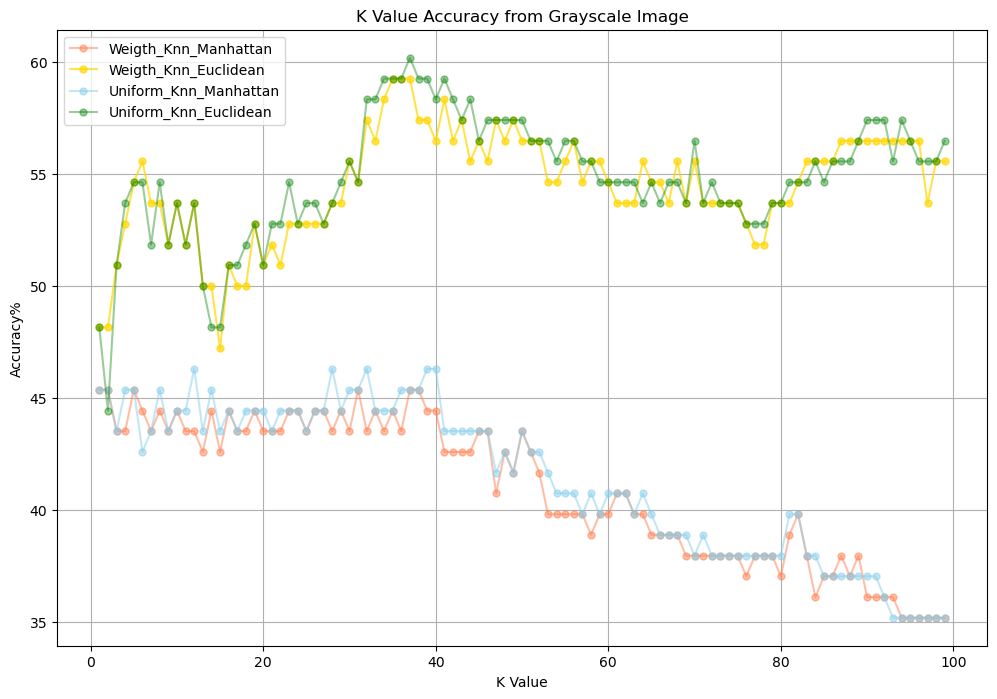

In [38]:
# Plot
names = list(dis_accuray_man.keys())
values = list(dis_accuray_man.values())
names2 = list(dis_accuray_uw.keys())
values2 = list(dis_accuray_uw.values())
names3 = list(dis_accuray_man_u.keys())
values3 = list(dis_accuray_man_u.values())
names4 = list(dis_accuray_uu.keys())
values4 = list(dis_accuray_uu.values())

x_val = range(1,100)
plt.subplots(figsize=(12,8))
plt.plot(x_val, values, color='coral', marker='o', markerfacecolor='coral', markersize=5, label='Weigth_Knn_Manhattan', alpha=0.5)
plt.plot(x_val, values2, color='gold', marker='o',markerfacecolor='gold', markersize=5, label="Weigth_Knn_Euclidean",alpha=0.7)
plt.plot(x_val, values3, color='skyblue', marker='o',markerfacecolor='skyblue', markersize=5, label="Uniform_Knn_Manhattan",alpha=0.5)
plt.plot(x_val, values4, color='green', marker='o',markerfacecolor='green', markersize=5, label="Uniform_Knn_Euclidean",alpha=0.4)
plt.grid()
plt.title('K Value Accuracy from Grayscale Image')
plt.xlabel('K Value')
plt.ylabel('Accuracy%')
plt.legend()

Accuracy: 0.5978260869565217
              precision    recall  f1-score   support

           0       0.73      0.50      0.59        32
           1       0.75      0.44      0.56        27
           2       0.50      0.82      0.62        33

    accuracy                           0.60        92
   macro avg       0.66      0.59      0.59        92
weighted avg       0.65      0.60      0.59        92



[Text(0, 0.5, 'Corgi'), Text(0, 1.5, 'German'), Text(0, 2.5, 'Golden')]

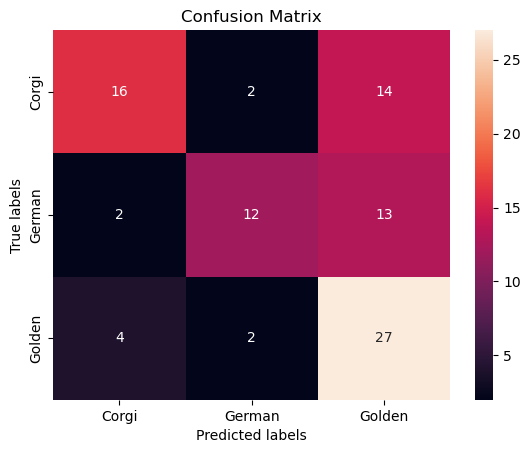

In [6]:
# Show the Confustion Marix
model = KNeighborsClassifier(n_neighbors=36, weights = 'uniform', p = 2)
model.fit(X_train_finalV, y_train.values.ravel())
y_pred = model.predict(X_test_finalV)
score = accuracy_score(y_pred,y_test)
print("Accuracy:", score)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Corgi', 'German' , 'Golden']); ax.yaxis.set_ticklabels(['Corgi', 'German' , 'Golden'])

In [73]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
# prepare a range of alpha values to test with GridSearchCV
param_grid = {'n_neighbors':list(range(1,30)) , 'weights': ['uniform','distance'] , 'p':[1,2]}
grid = GridSearchCV(knn, param_grid, cv = 5 , scoring = 'accuracy', refit=True, verbose = 1, return_train_score = True)
grid.fit(X_train_finalV, y_train.values.ravel())
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 5 folds for each of 116 candidates, totalling 580 fits
0.8567901234567901
KNeighborsClassifier(n_neighbors=1)


In [74]:
# show the Best Parameter
print(grid.best_params_)

{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


In [75]:
result = pd.DataFrame(grid.cv_results_)[['params','mean_test_score','rank_test_score']]
result.sort_values(by=['mean_test_score'],ascending=False).head()

,params,mean_test_score,rank_test_score
2,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.856790,1
3,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.856790,1
7,"{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}",0.856790,1
11,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",0.841667,4
15,"{'n_neighbors': 4, 'p': 2, 'weights': 'distance'}",0.835494,5


In [76]:
grid_pred = grid.predict(X_test_finalV)
cm = confusion_matrix(y_test, grid_pred)
print ("Confusion Matrix : \n", cm)
print(classification_report(y_test, grid_pred))

Confusion Matrix : 
 [[13  3 16]
 [ 4  7 16]
 [ 8  3 22]]
              precision    recall  f1-score   support

           0       0.52      0.41      0.46        32
           1       0.54      0.26      0.35        27
           2       0.41      0.67      0.51        33

    accuracy                           0.46        92
   macro avg       0.49      0.44      0.44        92
weighted avg       0.49      0.46      0.44        92



Accuracy: 0.45652173913043476


[Text(0, 0.5, 'Corgi'), Text(0, 1.5, 'German'), Text(0, 2.5, 'Golden')]

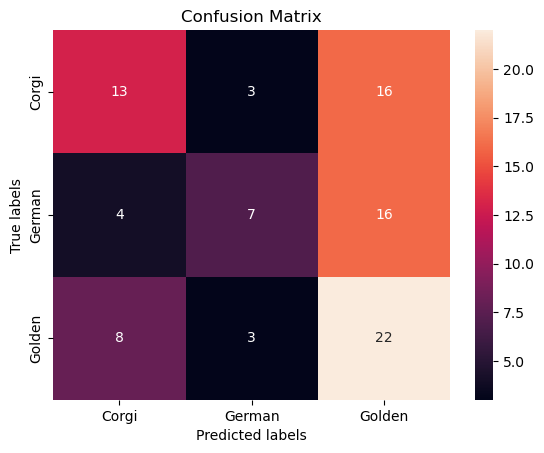

In [94]:
# Show the Confustion Marix
model = KNeighborsClassifier(n_neighbors=1, weights = 'uniform', p = 2)
model.fit(X_train_finalV, y_train.values.ravel())
y_pred = model.predict(X_test_finalV)
score = accuracy_score(y_pred,y_test)
print("Accuracy:", score)
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Corgi', 'German' , 'Golden']); ax.yaxis.set_ticklabels(['Corgi', 'German' , 'Golden'])

-----------
# SVM

In [77]:
from sklearn.model_selection import GridSearchCV
svm_clf = SVC()
# prepare a range of values to test
param_grid = {'kernel': ['poly', 'rbf'],'gamma': [1,0.1,0.01,0.001], 'gamma' :['scale','auto'],'C':[0.1,1,10,100]}
grid = GridSearchCV(svm_clf, param_grid, cv = 5, scoring = 'f1_macro', refit=True, verbose = 1, return_train_score = True)
grid.fit(X_train_finalV, y_train.values.ravel())
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
0.8673063713356537
SVC(C=10)


In [78]:
print(grid.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [79]:
result = pd.DataFrame(grid.cv_results_)[['params','mean_test_score','rank_test_score']]
result.sort_values(by=['mean_test_score'],ascending=False).head()

,params,mean_test_score,rank_test_score
9,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.867306,1
13,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.867283,2
11,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.850237,3
15,"{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}",0.849929,4
8,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",0.848948,5


In [80]:
grid_pred = grid.predict(X_test_finalV)
cm = confusion_matrix(y_test, grid_pred)
print ("Confusion Matrix : \n", cm)
print(classification_report(y_test, grid_pred, target_names=['Corgi', 'German', 'Golden']))

Confusion Matrix : 
 [[17  4 11]
 [ 2 14 11]
 [ 6  4 23]]
              precision    recall  f1-score   support

       Corgi       0.68      0.53      0.60        32
      German       0.64      0.52      0.57        27
      Golden       0.51      0.70      0.59        33

    accuracy                           0.59        92
   macro avg       0.61      0.58      0.59        92
weighted avg       0.61      0.59      0.59        92



Accuracy: 0.5869565217391305


[Text(0, 0.5, 'Corgi'), Text(0, 1.5, 'German'), Text(0, 2.5, 'Golden')]

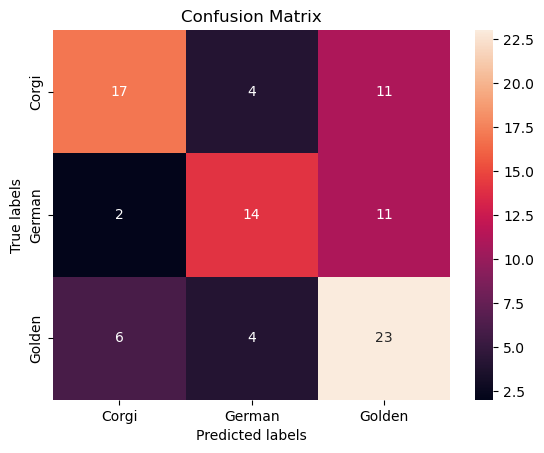

In [92]:
model = SVC(C= 10, gamma= 'scale', kernel = 'rbf')
model.fit(X_train_finalV, y_train.values.ravel())
y_pred = model.predict(X_test_finalV)
score = accuracy_score(y_pred,y_test)
print("Accuracy:", score)
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Corgi', 'German' , 'Golden']); ax.yaxis.set_ticklabels(['Corgi', 'German' , 'Golden'])

------------
## Random Forest

In [81]:
from sklearn.model_selection import GridSearchCV
rnd_clf = RandomForestClassifier()
# prepare a range of alpha values to test
param_grid = {'n_estimators':[400,500], 'max_leaf_nodes': [50,100,200], 'max_depth' :[3,5], 'max_features' :['sqrt','log2']}
grid = GridSearchCV(rnd_clf, param_grid, cv =5, scoring = 'f1_macro', refit=True, verbose = 1, return_train_score = True)
grid.fit(X_train_finalV, y_train.values.ravel())
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.7242117882605908
RandomForestClassifier(max_depth=5, max_leaf_nodes=50, n_estimators=500)


In [83]:
print(grid.best_params_)

{'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 50, 'n_estimators': 500}


In [82]:
result = pd.DataFrame(grid.cv_results_)[['params','mean_test_score','rank_test_score']]
result.sort_values(by=['mean_test_score'],ascending=False).head()

,params,mean_test_score,rank_test_score
13,"{'max_depth': 5, 'max_features': 'sqrt', 'max_...",0.724212,1
17,"{'max_depth': 5, 'max_features': 'sqrt', 'max_...",0.722479,2
14,"{'max_depth': 5, 'max_features': 'sqrt', 'max_...",0.721751,3
15,"{'max_depth': 5, 'max_features': 'sqrt', 'max_...",0.721150,4
16,"{'max_depth': 5, 'max_features': 'sqrt', 'max_...",0.716500,5


In [84]:
grid_pred = grid.predict(X_test_finalV)
cm = confusion_matrix(y_test, grid_pred)
print ("Confusion Matrix : \n", cm)
print(classification_report(y_test, grid_pred, target_names=['Corgi', 'German', 'Golden']))

Confusion Matrix : 
 [[12  4 16]
 [ 2 19  6]
 [ 3  5 25]]
              precision    recall  f1-score   support

       Corgi       0.71      0.38      0.49        32
      German       0.68      0.70      0.69        27
      Golden       0.53      0.76      0.62        33

    accuracy                           0.61        92
   macro avg       0.64      0.61      0.60        92
weighted avg       0.64      0.61      0.60        92



Accuracy: 0.6086956521739131


[Text(0, 0.5, 'Corgi'), Text(0, 1.5, 'German'), Text(0, 2.5, 'Golden')]

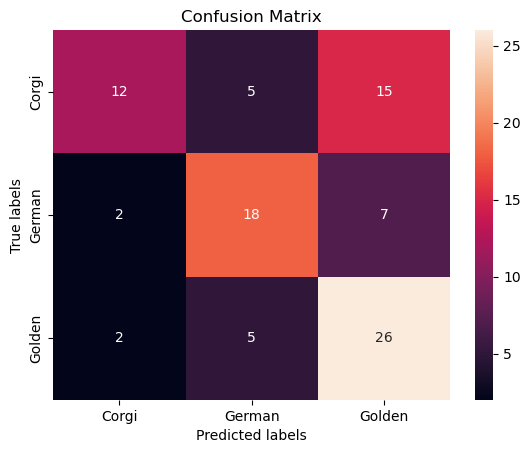

In [91]:
model = RandomForestClassifier(n_estimators=500, max_leaf_nodes = 50, max_depth = 5, max_features = 'sqrt')
model.fit(X_train_finalV, y_train.values.ravel())
y_pred = model.predict(X_test_finalV)
score = accuracy_score(y_pred,y_test)
print("Accuracy:", score)
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Corgi', 'German' , 'Golden']); ax.yaxis.set_ticklabels(['Corgi', 'German' , 'Golden'])